In [91]:
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
from typing import List
import math

### Случайная величина имеет экспоненциальный закон распределения


\begin{equation*} 
p(x) =
\begin{cases} 
e^{-x}, & \ x \geq 0, \\
0, & \ x < 0.
\end{cases}
\end{equation*}

#### Сгенерируйте выборку объема n = 25.  

In [92]:
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

def F_inv(y: float) -> float:
    return -np.log(1 - y)

def generate_samples(n: int) -> List[float]:
    return [F_inv(random.random()) for _ in range(n)]

N = 25
arr = generate_samples(N)

### a) Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии.

In [93]:
def calculate_mode(arr: List[float]) -> float:
    return max(set(arr), key=arr.count)

def calculate_skewness(arr: List[float]) -> float:
    mean = np.mean(arr)
    std = np.std(arr)
    mu3 = np.mean((arr - mean) ** 3)
    return mu3 / (std ** 3)

moda = calculate_mode(arr)
median = np.median(arr)
range_ = np.ptp(arr)
skewness = calculate_skewness(arr)

print('Мода:', moda)
print('Медиана:', median)
print('Размах:', range_)
print('Оценка коэффициента асимметрии:', skewness)

Мода: 0.5244860256144597
Медиана: 0.5244860256144597
Размах: 4.10622690857052
Оценка коэффициента асимметрии: 1.681661587307351


### b) Построить эмпирическую функцию распределения, гистограмму и boxplt.

#### Эмпирическая функция распределения

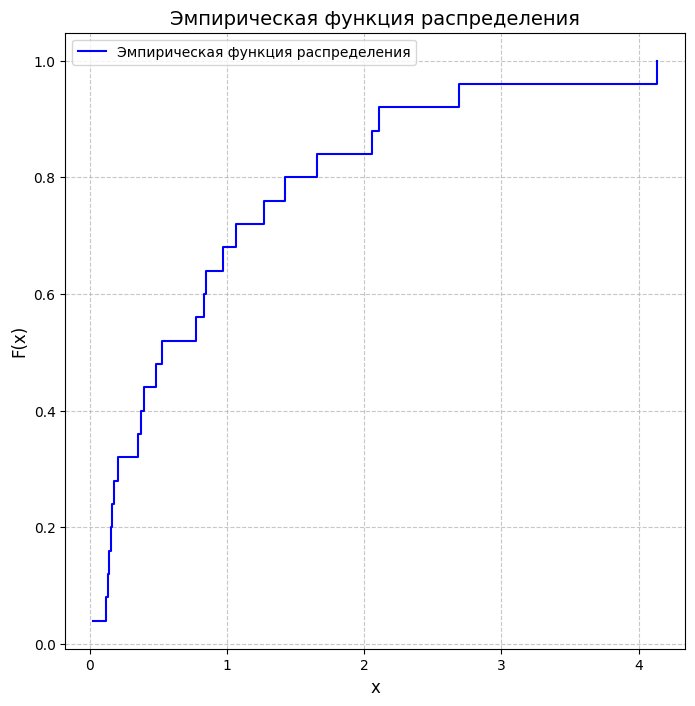

In [94]:
x_vals = np.sort(arr)
y_vals = np.arange(1, N + 1) / N

plt.figure(figsize=(8, 8))
plt.step(x_vals, y_vals, color="b", where="post", label="Эмпирическая функция распределения")
plt.xlabel("x", fontsize=12)
plt.ylabel("F(x)", fontsize=12)
plt.title("Эмпирическая функция распределения", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

#### Гистограмма

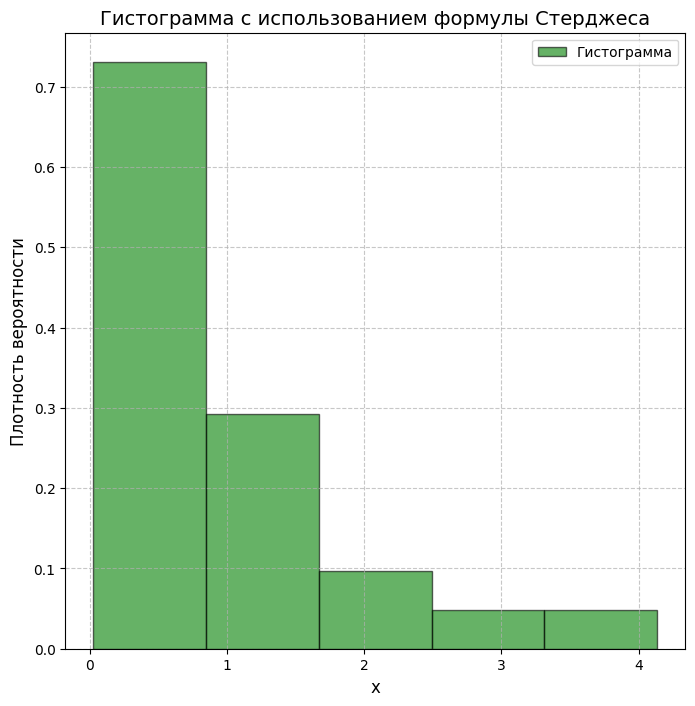

In [95]:
plt.figure(figsize=(8, 8))
plt.hist(
    arr,
    bins=1 + int(np.log2(N)),  # Формула Стерджеса для определения числа бинов
    alpha=0.6,
    color='g',
    density=True,  # Нормировка гистограммы
    edgecolor='black',
    label='Гистограмма'
)
plt.xlabel('x', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Гистограмма с использованием формулы Стерджеса', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

#### Boxplt

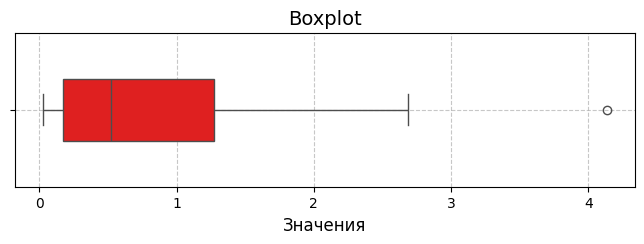

In [96]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=arr, color="r", width=0.4)
plt.title("Boxplot", fontsize=14)
plt.xlabel("Значения", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### c) Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповой оценкой этой плотности.

#### ЦПТ

$$
\mathbb{M}[\xi] = \int_{-\infty}^{\infty} x f(x) \,dx = \int_{0}^{\infty} x e^{-x} \,dx = 1
$$

$$
\mathbb{M}[\xi^2] = \int_{-\infty}^{\infty} x^2 f(x) \,dx = \int_{0}^{\infty} x^2 e^{-x} \,dx = 2
$$

$$
\mathbb{D}[\xi] = \mathbb{M}[\xi^2] - \mathbb{M}[\xi]^2 = 2 - 1^2 = 1
$$

$$
\frac{\overline{x} - \mathbb{M}[\xi]}{ \sqrt{\mathbb{D}[\xi]}} \sqrt{n} \longmapsto N(0, 1)
$$

$$
\frac{\overline{x} - 1}{ \sqrt{1}}  \sqrt{25} \longmapsto N(0, 1)
$$
$$
\overline{x} \longmapsto N(1, (1/5)^2)
$$

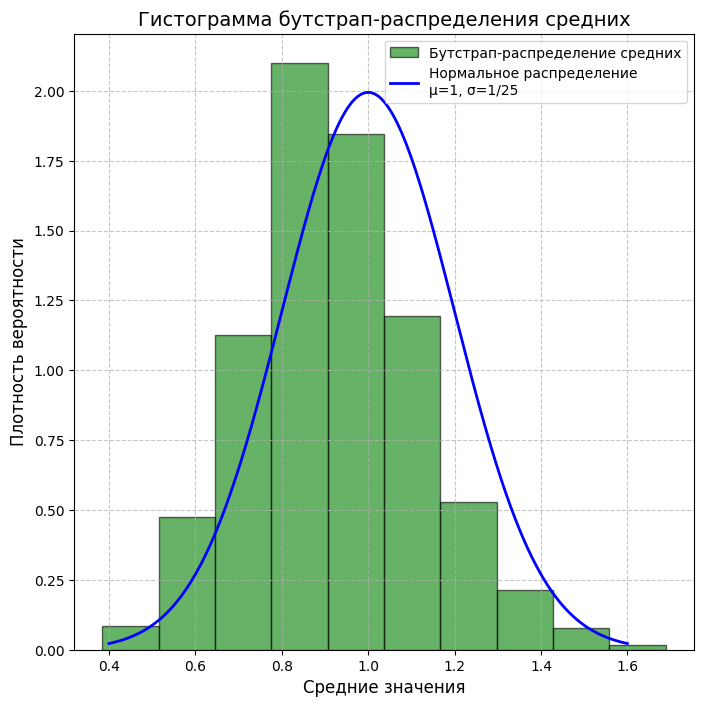

In [97]:
n_iterations = 1000

bootstrap_means = []
for _ in range(n_iterations):
    sample = np.random.choice(arr, size=len(arr), replace=True)
    bootstrap_means.append(np.mean(sample))

mu = 1
sigma = 1/5 # корень из 1/25

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8, 8))
plt.hist(
    bootstrap_means,
    bins=1 + int(np.log2(n_iterations)),
    alpha=0.6,
    color='g',
    density=True,
    edgecolor='black',
    label='Бутстрап-распределение средних'
)
plt.plot(x, y, label=f"Нормальное распределение\nμ=1, σ=1/25", color='blue', linewidth=2)
plt.xlabel('Средние значения', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Гистограмма бутстрап-распределения средних', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

### d) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1.

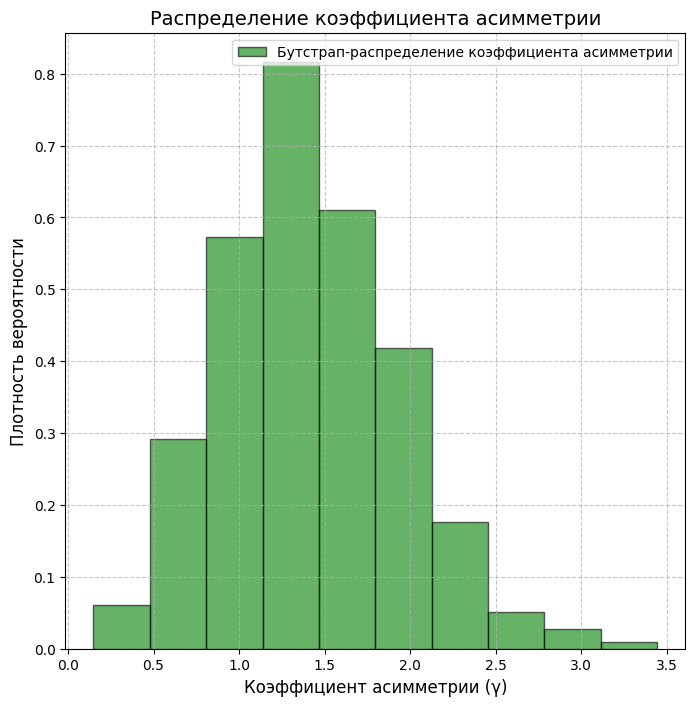

In [100]:
bootstrap_asymm = []
for _ in range(n_iterations):
    sample = np.random.choice(arr, size=len(arr), replace=True)
    bootstrap_asymm.append(calculate_skewness(sample))

plt.figure(figsize=(8, 8))
plt.hist(
    bootstrap_asymm,
    bins=1 + int(np.log2(n_iterations)),
    alpha=0.6,
    color='g',
    density=True,
    edgecolor='black',
    label='Бутстрап-распределение коэффициента асимметрии'
)
plt.xlabel('Коэффициент асимметрии (γ)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Распределение коэффициента асимметрии', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

In [102]:
m = np.sum([1 if bootstrap_asymm[i] < 1 else 0 for i in range(n_iterations)])

print("Оценка вероятности того, что коэффициент ассиметрии меньше 1:", m/n_iterations)

Оценка вероятности того, что коэффициент ассиметрии меньше 1: 0.217


### e) Сравнить плотность распределения медианы выборки с бутстраповой оценкой этой плотности.

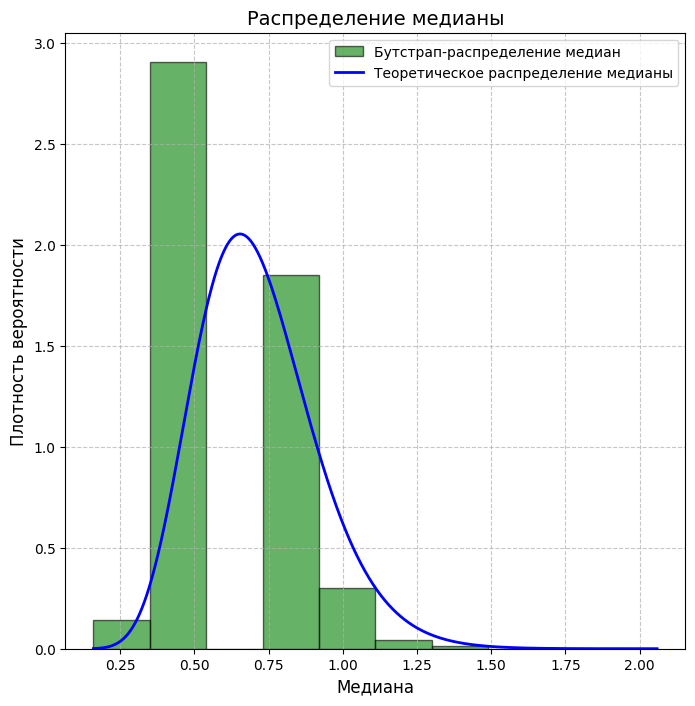

In [112]:
bootstrap_medians = []
for _ in range(n_iterations):
    sample = np.random.choice(arr, size=len(arr), replace=True)
    bootstrap_medians.append(np.median(sample))

x = np.linspace(min(bootstrap_medians), max(bootstrap_medians), 1000)
y = [N * p(z) * math.comb(N - 1, N // 2) * (1 - F(z))**(N - N // 2 - 1) * F(z)**(N // 2) for z in x]

plt.figure(figsize=(8, 8))
plt.hist(
    bootstrap_medians,
    bins=1 + int(np.log2(n_iterations)),
    alpha=0.6,
    color='g',
    density=True,
    edgecolor='black',
    label='Бутстрап-распределение медиан'
)
plt.plot(x, y, label="Теоретическое распределение медианы", color='blue', linewidth=2)
plt.xlabel('Медиана', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Распределение медианы', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()